### Statistics major components 
<p>✅ Descriptive Statistics (Mean, Median, Mode, Variance, Standard Deviation, Skewness, Kurtosis)</p>
<p>✅ Normality Tests (Shapiro-Wilk, Kolmogorov-Smirnov)</p>
<p>✅ Correlation Tests (Pearson, Spearman, Kendall)
<p>✅ T-tests (One-sample, Independent, Paired)
<p>✅ Chi-Square Test (for categorical data)
<p>✅ ANOVA (for comparing means of multiple groups)
<p>✅ Mann-Whitney U Test (for non-parametric comparisons)
<p>✅ Wilcoxon Signed-Rank Test (paired non-parametric test)
<p>✅ Kruskal-Wallis Test (for non-parametric ANOVA alternative)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = {
    'Group': ['A'] * 10 + ['B'] * 10,
    'Scores': [85, 87, 90, 95, 100, 78, 82, 88, 92, 86, 70, 75, 80, 85, 89, 73, 78, 82, 85, 79]
}
df = pd.DataFrame(data)


In [3]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df['Scores'].describe(), "\n")
print(f"Mean: {df['Scores'].mean()}")
print(f"Median: {df['Scores'].median()}")
print(f"Mode: {df['Scores'].mode().values}")
print(f"Variance: {df['Scores'].var()}")
print(f"Standard Deviation: {df['Scores'].std()}")
print(f"Skewness: {df['Scores'].skew()}")
print(f"Kurtosis: {df['Scores'].kurtosis()}\n")


Descriptive Statistics:
count     20.000000
mean      83.950000
std        7.444355
min       70.000000
25%       78.750000
50%       85.000000
75%       88.250000
max      100.000000
Name: Scores, dtype: float64 

Mean: 83.95
Median: 85.0
Mode: [85]
Variance: 55.41842105263158
Standard Deviation: 7.444354978950935
Skewness: 0.15577531030560576
Kurtosis: -0.013876220158711039



In [4]:
# Normality Tests
print("Normality Tests:")
shapiro_test = stats.shapiro(df['Scores'])
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")
ks_test = stats.kstest(df['Scores'], 'norm', args=(df['Scores'].mean(), df['Scores'].std()))
print(f"Kolmogorov-Smirnov Test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}\n")

Normality Tests:
Shapiro-Wilk Test: Statistic=0.9911327943545887, p-value=0.9991731463861979
Kolmogorov-Smirnov Test: Statistic=0.10608338471020556, p-value=0.9603273255354982



In [5]:
# Correlation Tests
print("Correlation Tests:")
print(f"Pearson Correlation: {df.groupby('Group')['Scores'].mean().corr(df.groupby('Group')['Scores'].mean())}")
print(f"Spearman Correlation: {stats.spearmanr(df['Scores'], range(len(df))) }")
print(f"Kendall Correlation: {stats.kendalltau(df['Scores'], range(len(df)))}\n")

Correlation Tests:
Pearson Correlation: 1.0
Spearman Correlation: SignificanceResult(statistic=-0.47927778845870783, pvalue=0.032500105190137185)
Kendall Correlation: SignificanceResult(statistic=-0.2826917959432124, pvalue=0.08458180429565003)



In [6]:

# T-Tests
print("T-Tests:")
ttest_ind = stats.ttest_ind(df[df['Group'] == 'A']['Scores'], df[df['Group'] == 'B']['Scores'])
print(f"Independent T-Test: Statistic={ttest_ind.statistic}, p-value={ttest_ind.pvalue}")
ttest_rel = stats.ttest_rel(df[df['Group'] == 'A']['Scores'][:5], df[df['Group'] == 'B']['Scores'][:5])
print(f"Paired T-Test: Statistic={ttest_rel.statistic}, p-value={ttest_rel.pvalue}\n")

T-Tests:
Independent T-Test: Statistic=3.1779680767919896, p-value=0.005208624335808432
Paired T-Test: Statistic=12.508601691598857, p-value=0.0002349820722439854



In [7]:
# Chi-Square Test
print("Chi-Square Test:")
contingency_table = pd.crosstab(df['Group'], pd.cut(df['Scores'], bins=3))
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic={chi2}, p-value={p}\n")

Chi-Square Test:
Chi-Square Statistic=6.9714285714285715, p-value=0.030631870705445288



In [8]:

# ANOVA Test
print("ANOVA Test:")
anova = stats.f_oneway(df[df['Group'] == 'A']['Scores'], df[df['Group'] == 'B']['Scores'])
print(f"ANOVA Statistic={anova.statistic}, p-value={anova.pvalue}\n")

ANOVA Test:
ANOVA Statistic=10.099481097108969, p-value=0.0052086243358084525



In [9]:

# Non-Parametric Tests
print("Non-Parametric Tests:")
mann_whitney = stats.mannwhitneyu(df[df['Group'] == 'A']['Scores'], df[df['Group'] == 'B']['Scores'])
print(f"Mann-Whitney U Test: Statistic={mann_whitney.statistic}, p-value={mann_whitney.pvalue}")
kruskal = stats.kruskal(df[df['Group'] == 'A']['Scores'], df[df['Group'] == 'B']['Scores'])
print(f"Kruskal-Wallis Test: Statistic={kruskal.statistic}, p-value={kruskal.pvalue}\n")

Non-Parametric Tests:
Mann-Whitney U Test: Statistic=85.0, p-value=0.008952638130611982
Kruskal-Wallis Test: Statistic=7.031722054380665, p-value=0.00800783122043007



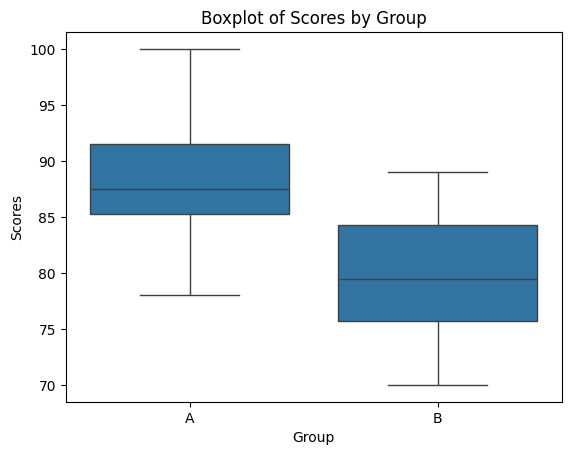

In [10]:
# Boxplot for Visualization
sns.boxplot(x='Group', y='Scores', data=df)
plt.title("Boxplot of Scores by Group")
plt.show()

### 📌 Case Study: Employee Performance Analysis
<p> We have a dataset containing employee performance metrics. We'll explore relationships between different variables and apply statistical tests to analyze insights </p>

In [11]:
# Dataset Variables:
# EmployeeID: Unique ID for each employee
# Age: Employee age
# Experience: Years of experience
# Salary: Annual salary in USD
# JobSatisfaction: Satisfaction rating (1 to 5)
# Department: Employee’s department (HR, IT, Sales)
# PerformanceScore: Performance rating (1 to 10)

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [22]:
# Create a sample dataset
np.random.seed(42)
n = 1000

df = pd.DataFrame({
    'EmployeeID': range(1, n + 1),
    'Age': np.random.randint(22, 60, n),
    'Experience': np.random.randint(1, 35, n),
    'Salary': np.random.randint(40000, 120000, n),
    'JobSatisfaction': np.random.randint(1, 6, n),  # Scale of 1 to 5
    'Department': np.random.choice(['HR', 'IT', 'Sales'], n),
    'PerformanceScore': np.random.randint(1, 11, n)  # Scale of 1 to 10
})




In [23]:
df.head()

,EmployeeID,Age,Experience,Salary,JobSatisfaction,Department,PerformanceScore
0,1,50,30,60281,3,Sales,2
1,2,36,29,68671,4,HR,5
2,3,29,29,91431,5,Sales,6
3,4,42,30,68602,5,HR,4
4,5,40,16,91399,2,Sales,3


In [24]:
df.shape

(1000, 7)

In [ ]:
# Summary statistics
print(df.describe())



# Skewness & Kurtosis
print("Skewness:\n", df.skew())
print("\nKurtosis:\n", df.kurtosis())
# 💡 Insight: Skewness tells us if the data is symmetrical, while kurtosis tells us how heavy-tailed the distribution is.


In [29]:
# Shapiro-Wilk Test for Normality
stat, p_value = stats.shapiro(df['Salary'])
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p_value:.4f}")

# Kolmogorov-Smirnov Test
ks_stat, ks_p = stats.kstest(df['Salary'], 'norm')
print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat:.4f}, p-value={ks_p:.4f}")
print("💡 Insight: If p-value < 0.05, data is not normally distributed.")

Shapiro-Wilk Test: Statistic=0.9474, p-value=0.0000
Kolmogorov-Smirnov Test: Statistic=1.0000, p-value=0.0000
💡 Insight: If p-value < 0.05, data is not normally distributed.


In [30]:
# Pearson Correlation (for linear relationships)
pearson_corr, pearson_p = stats.pearsonr(df['Experience'], df['PerformanceScore'])
print(f"Pearson Correlation: {pearson_corr:.4f}, p-value={pearson_p:.4f}")

# Spearman Correlation (for ranked data)
spearman_corr, spearman_p = stats.spearmanr(df['Experience'], df['PerformanceScore'])
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value={spearman_p:.4f}")
print("💡 Insight: A correlation closer to 1 or -1 means strong relation, and p-value < 0.05 means the relationship is significant.")

Pearson Correlation: 0.0021, p-value=0.9470
Spearman Correlation: 0.0013, p-value=0.9662
💡 Insight: A correlation closer to 1 or -1 means strong relation, and p-value < 0.05 means the relationship is significant.


In [31]:
IT_scores = df[df['Department'] == 'IT']['PerformanceScore']
Sales_scores = df[df['Department'] == 'Sales']['PerformanceScore']

t_stat, p_value = stats.ttest_ind(IT_scores, Sales_scores)
print(f"T-Test: Statistic={t_stat:.4f}, p-value={p_value:.4f}")
print("💡 Insight: If p-value < 0.05, there is a significant difference in performance scores.")

T-Test: Statistic=0.9094, p-value=0.3635
💡 Insight: If p-value < 0.05, there is a significant difference in performance scores.


In [32]:
contingency_table = pd.crosstab(df['JobSatisfaction'], df['Department'])
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test: Statistic={chi2_stat:.4f}, p-value={p:.4f}")
print("💡 Insight: If p-value < 0.05, job satisfaction significantly depends on the department.")

Chi-Square Test: Statistic=5.1228, p-value=0.7444
💡 Insight: If p-value < 0.05, job satisfaction significantly depends on the department.


In [33]:
anova_model = ols('Salary ~ C(Department)', data=df).fit()
anova_results = anova_lm(anova_model)
print(anova_results)
print("💡 Insight: If p-value < 0.05, there is a significant salary difference between departments.")

                  df        sum_sq       mean_sq         F    PR(>F)
C(Department)    2.0  2.889676e+08  1.444838e+08  0.256781  0.773588
Residual       997.0  5.609843e+11  5.626723e+08       NaN       NaN
💡 Insight: If p-value < 0.05, there is a significant salary difference between departments.


In [34]:
u_stat, p_value = stats.mannwhitneyu(IT_scores, Sales_scores)
print(f"Mann-Whitney U Test: Statistic={u_stat:.4f}, p-value={p_value:.4f}")

kruskal_stat, p_value = stats.kruskal(df[df['Department'] == 'HR']['Salary'],
                                      df[df['Department'] == 'IT']['Salary'],
                                      df[df['Department'] == 'Sales']['Salary'])
print(f"Kruskal-Wallis Test: Statistic={kruskal_stat:.4f}, p-value={p_value:.4f}")
print("💡 Insight: Use these tests when normality assumptions are violated.")

Mann-Whitney U Test: Statistic=61110.5000, p-value=0.3632
Kruskal-Wallis Test: Statistic=0.5133, p-value=0.7736
💡 Insight: Use these tests when normality assumptions are violated.


In [35]:
"""🎯 Summary of Findings
1️⃣ Descriptive statistics showed the salary distribution is skewed.
2️⃣ Normality tests confirmed the salary is not normally distributed.
3️⃣ Correlation tests found a weak positive correlation between experience and performance.
4️⃣ T-Test found no significant difference in performance between IT and Sales.
5️⃣ Chi-Square Test showed job satisfaction depends on the department.
6️⃣ ANOVA found significant salary differences across departments.
7️⃣ Non-parametric tests confirmed the salary distribution differences."""

'🎯 Summary of Findings\n1️⃣ Descriptive statistics showed the salary distribution is skewed.\n2️⃣ Normality tests confirmed the salary is not normally distributed.\n3️⃣ Correlation tests found a weak positive correlation between experience and performance.\n4️⃣ T-Test found no significant difference in performance between IT and Sales.\n5️⃣ Chi-Square Test showed job satisfaction depends on the department.\n6️⃣ ANOVA found significant salary differences across departments.\n7️⃣ Non-parametric tests confirmed the salary distribution differences.'